# T020 - Analyzing Molecular Dynamics Simulations

Authors:
- Mareike Leja, CADD seminar, 2020, Charité/FU Berlin
- David Schaller, Volkamer lab, Charité

Berlin, 21.05.2020

__Talktorial T20__

## Aim of this talktorial

The aim of this notebook is to introduce methods for the analysis of MD Simulations. We are working with the results of a MD Simulation performed with talktorial T019 on the EGFR kinase bound to inhibitor 03P.
The introduced methods include animated visualization, RMSD calculation and distance and hydrogenbond analysis.

## Learning Goals

### Contents in *Theory*

* MD Simulations in the drug discovery process
    * MD Simulations vs Static Structures
    * Coupled Methods for Investigation of Ligand Binding
* Analyzing MD Simulations
    * Visualization
    * RMSD
    * Hydrogen Bond Analysis

### Contents in *Practical*

* Load and Visualize MD Simulation
* RMSD of Protein and Ligand
    * RMSD over Time
    * RMSD between Frames
* Interaction analysis
    * Atomic Distances
    * Hydrogen Bond Analysis

### References

Theoretical Background:

* De Vivo M et al. *Role of Molecular Dynamics and Related Methods in Drug Discovery*
    __[J Med Chem. 2016, 59(9):4035-61](https://pubmed.ncbi.nlm.nih.gov/26807648/)__
* Sereina Riniker, *Fixed-Charge Atomistic Force Fields for Molecular Dynamics Simulations in the Condensed Phase: An Overview* __[J. Chem. Inf. Model. 2018, 58(3):565–578](https://pubs.acs.org/doi/10.1021/acs.jcim.8b00042)__
* Wikipedia Article on Root-Mean-Square-Deviation __[RMSD](https://en.wikipedia.org/wiki/Root-mean-square_deviation)__
* Rohan Patil, *Optimized Hydrophobic Interactions and Hydrogen Bonding at the Target-Ligand Interface Leads the Pathways of Drug-Designing* __[PLoS One. 2010. 5(8)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2922327/)__
* R. C. Wade, P. J. Goodford, *The Role of Hydrogen-Bonds in Drug Binding* __[Prog Clin Biol Res. 1989, 289:433-44](https://pubmed.ncbi.nlm.nih.gov/2726808/)__


Special Packages used:

* __[MDAnalysis](https://www.mdanalysis.org/)__
* __[NGL View](https://github.com/arose/nglview)__

## Theory

### MD Simulations in the Drug Discovery Process

During the past decade the importance of structure-based drug design was ever growing. Especially the development of better algorithms and faster architectures paved the way for Molecular Dynamics (MD) to becoming routine computational tools for drug discovery. 

The main advantage is the more accurate estimation of drug-target recognition and binding processes. An array of methods build on MD Simulations provide tool for most problems encountered during the challenging process of designing, selecting and optimizing new drug candidates.

### MD Simulations vs Static Structures

Static models also evaluate the affinity a drug candidate has to the target, but static calculations alone are not enough to to comprehensively characterize drug-target binding. The numerous interactions between ligand, target and surroundings cannot be captured solely by the enthalpy of the current equilibrium state of the system.

Forcefield-based MD Simulations on the other hand fully account for structural flexibility and entropic effects. 
They allow for modeling of induced-fit bindings and conformational selection and can even be used to run unbiased simulations with unsupervised ligand-target binding.

### Coupled Methods for Investigation of Ligand Binding

While being a straightforward way of simulating drug-binding events, unbiased MD is costly. Thus it is often coupled with so-called enhanced sampling methods to accelerate the process.

One of these is the **Free energy perturbation (FEP)**, which computes the free energy difference when going from a state A to another state B.  It is used for studying binding energetics and is applied in the virtual screening of ligands during the drug discovery process. Furthermore, it is employed in lead optimization being especially good at predicting small modification, that will boost the ligand-binding affinity for the target. One successful example for this optimization is the design of the most potent non-nucleoside inhibitors of HIV-1 reverse transcriptase.

Another technique for free-energy calculations is **Umbrella sampling (US)**. US enforces sampling along a collective variable (CV) by performing staged simulations with an energetic bias. The bias usually takes the form of a harmonic potential, hence the term "umbrella". Its goal is to sample high-energy regions along the CV, but the use in drug design is limited by the high computational cost.

**Steered MD (SMD)**  on the other hand follows a different approach: it applies external forces to the system. Those forces are time-dependent and facilitate the unbinding of the ligand from the target.
The SMD calculates the final force exerted on the system. The unbinding force profile can then be used to improve docking and discriminate active and inactive binders.

Lastly, a broad family of enhanced sampling techniques is cumulated in the term of **Metadynamics-Based Methods**. Those aim to explore the free-energy landscapes of rare events. For this purpose a set of CVs is used, that approximate the true reaction coordinate of the event.
Metdaynamics demonstrates a high ability to characterize binding and unbinding paths, to treat conformation flexibility,and to compute free-energy profiles and thus is able to accurately compute the entire physical path of protein−ligand binding and/or unbinding. Nevertheless, for calculations of relative free energy concerning a set of compounds in binding poses other methods like FEP are often more efficient.

### Analyzing MD Simulations

A MD Simulation is defined by a list of atoms and a file with trajectories, which describe the movement of the atoms for up to a few milliseconds. This allows for exploration of different aspects. 

#### Visualization

The MD Simulation can be used to create an animated 3D model of the molecules. These allow for observation of conformational changes, fluctuations and binding processes with the bare eye.

![Model](images/model.gif)
Fig. 1: Visualization of MD Simulation of AdK, [NGL View Example](https://github.com/arose/nglview/blob/master/examples/mdanalysis.md)

#### RMSD

RMSD stands for Root-mean-square deviation of atomic positions and is a measurement of the average distance between atoms. Particularly, the distance between two sets of coordinates is calculated. 
One use of RMSD Plots is to depict the relative movement of whole molecules or their domains during folding or docking processes. 
During the process the coordinates of the moving molecule are compared to the starting positions.
RMSD can also be used to compare computed docking configurations to known (i.e. crystallographic) binding poses to validate the docking protocol.

For two, usually superimposed, sets of coordinates v and w with n atoms the RMSD is defined as follows:

$$RMSD(v,w) = \frac{1}{n} \sum_{i=1}^n \|v_i - w_i\|²$$

For random movements of stable structures the root-mean-square fluctuation (RMSF) is used instead.

#### Hydrogen Bond Analysis

Non-covalent hydrogen bonds are key-players in the bonding and stabilization of proteins and ligands. 
Analysis of hydrogen bonds in the computed binding can thus give valuable information about the stability of the structure.
The strength of H-Bonds is determined by the angle and the distance between the donor and acceptor atoms. 
A small distance and an angle close to 180° are signs for a strong bond, while bigger distances and smaller angles point towards a weaker bond.
![H-Bonds](images/CADD_Hbonds.png)
Fig. 2: Hydrogen Bond Strength, *Mareike Leja, CADD Seminar 2020*

For hydrogen bond detection in computational analysis, geometric criteria define which interactions are recorded as bonds: The distance between acceptor and hydrogen has to be less than or equal to a distance threshold and 
the angle between donor-hydrogen-acceptor has to be greater than or equal to an angle threshold.
For example, the Python Package __[MD Analysis](https://www.mdanalysis.org/docs/documentation_pages/analysis/hbond_analysis.html)__, which we will use for analysis, sets the default maximum distance at 3Å and the minimum angle at 120°. 

## Practical


In the following we will load a MD Simulation and analyze the ligand binding process. 
The MD Simulation we analyze is a simulation done with the script from Talktorial T19, which uses the  Epidermal Growth Factor Receptor (EGFR) kinase and inhibitor 03P. We simulated 1ns with 100 frames.
We will visualize the simulation and then perform a RMSD calculation and bonding analysis. 

The data can be downloaded from https://zenodo.org/record/3910753.

Before we start we have to import the needed modules.

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import diffusionmap, align
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
from MDAnalysis.analysis.distances import dist

In [2]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Load and Visualize the Molecule

As the first step we load the topology and the trajectory file to create a universe representing the simulation. The universe can easily be visualized in its entirety, including the animation of the trajectories.

In [3]:
u = mda.Universe(str(DATA / "topology.pdb"), str(DATA / "trajectory.xtc"))
view = nv.show_mdanalysis(u)
view

NGLWidget(max_frame=99)

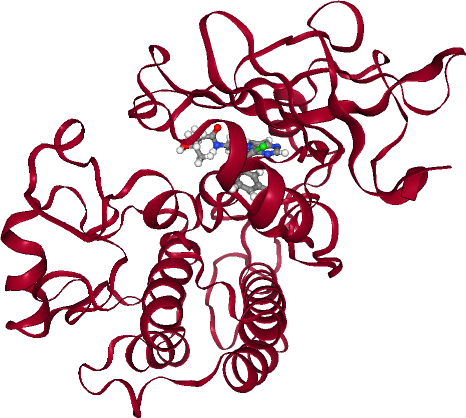

In [27]:
view.render_image(trim=True, factor=2, transparent=True);
view._display_image()

### RMSD of Protein and Ligand

Protein and ligand are clearly extinguishable in the animation. Both undergo some conformational changes during the binding process.
In this part we will evaluate the relative movement using the RMSD.
The MD Analysis framework allows for selection of atom groups with strings and has some built-in default strings as well, for example "protein", which selects all residues usually found in proteins.
The ligand is best selected by its distinct residue name. In this case we know it is the inhibitor 03P, but we could also find the name from either inspecting the topology file or hovering a ligand atom in the animation above. The atoms of our ligand are identified by the residue name "03P".

In [5]:
ligand_name = "03P"

#### RMSD over time

For plotting the RMSD easily we write a function that does the RMSD calculation for selected atomgroups from the universe. It returns a plotable Pandas Dataframe.

In [6]:
def rmsd_for_atomgroups(universe, selection1, selection2=None):
    """ Calulate the RMSD for selected atomgroups.

    Parameters
    ----------
    universe : MDAnalysis.core.universe.Universe
    selection1: str
        selection string for main atomgroup
    selection2: list of str, optional
        selection strings for secondary atomgroups

    Returns
    -------
    rmsd_df : pandas.core.frame.DataFrame
        DataFrame containing RMSD of the selections over time

    """
    universe.trajectory[0]
    ref = universe
    rmsd_analysis = rms.RMSD(universe, ref,
                             select=selection1, groupselections=selection2)
    rmsd_analysis.run()
    columns = [selection1, *selection2] if selection2 else [selection1]
    rmsd_df = pd.DataFrame(rmsd_analysis.rmsd[:, 2:],
                           columns=columns)
    rmsd_df.index.name = "frame"
    return rmsd_df

Run the function with selections for the whole protein, the protein backbone atoms and the ligand to calculate the RMSD for the molecules during the interaction. During the calculation the molecule will be superimposed to the first frame along the backbone of the protein.

In [7]:
rmsd = rmsd_for_atomgroups(u, "backbone", ["protein", "resname " + ligand_name])
rmsd.head()

,backbone,protein,resname 03P
frame,,,
0,3.030020e-07,3.514412e-07,1.040544e-07
1,8.333341e-01,1.119863e+00,1.716551e+00
2,9.630942e-01,1.280879e+00,1.616251e+00
3,9.897188e-01,1.359487e+00,1.574624e+00
4,1.025535e+00,1.437202e+00,1.507839e+00


If needed, we can change the column names to be more concise. 
Then we plot the results.

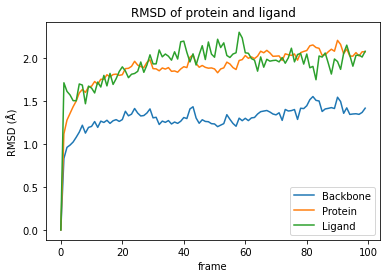

In [8]:
rmsd.columns = ["Backbone", "Protein", "Ligand"]
rmsd.plot(title="RMSD of protein and ligand")
plt.ylabel("RMSD (Å)");

The protein is superimposed along the backbone and thus there are only slight conformational changes during the reaction. The sidechains included in the whole protein lead to more movement when compared to the protein backbone.
The ligand, however, can move more freely and additionally to any conformational changes there might be directional movement involved, which is more likely the case if the RMSD values for the ligand are exceptionally high.

#### RMSD between frames

The plot before showed the distance at the given time compared to the initial state.
Now we calculate the differences between the frames and visualize them in a heatmap.

In [9]:
def RMSD_dist_frames(u, selection_string):
    """ Calculate the distance between frames using RMSD.

    Parameters
    ----------
    universe : MDAnalysis.core.universe.Universe
    selection1: str
        selection string for the atomgroup to be investigated

    Returns
    -------
    array
        distance values

    """
    align.AlignTraj(u, u, select=selection_string,
                    in_memory=True).run()
    matrix = diffusionmap.DistanceMatrix(u, select=selection_string).run()

    return matrix.dist_matrix

First, we calculate the distance matrices for protein and ligand using the function above.
Then we plot them side by side as heatmaps.

In [10]:
dist_matrix_p = RMSD_dist_frames(u, "protein")
dist_matrix_np = RMSD_dist_frames(u, "resname " + ligand_name)

In order to achieve comparable heatmaps it is important to set minimal and maximal values to the same values in both plots. We set the minimal value to 0 and derive the upper bound from the distance matrices.

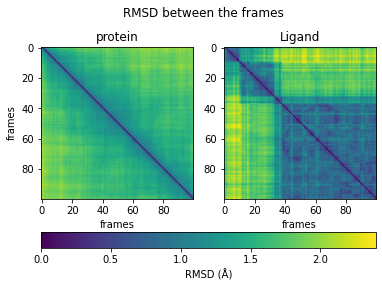

In [11]:
fig, ax = plt.subplots(1, 2)
fig.suptitle("RMSD between the frames")
max_dist = max(np.amax(dist_matrix_np), np.amax(dist_matrix_p))

img1 = ax[0].imshow(dist_matrix_p, cmap="viridis", vmin=0, vmax=max_dist)
ax[0].title.set_text("protein")
ax[0].set_xlabel("frames")
ax[0].set_ylabel("frames")

img2 = ax[1].imshow(dist_matrix_np, cmap="viridis", vmin=0, vmax=max_dist)
ax[1].title.set_text("Ligand")
ax[1].set_xlabel("frames")

fig.colorbar(img1, ax=ax, orientation="horizontal", fraction=.1, label="RMSD (Å)")

From the heatmaps we can conclude that the protein moves constantly and evenly between the states. The ligand moves more randomly and 'jumps' to different states. Sometimes it can reach similar conformations repeatedly.

### Interaction analysis

Now we will look at the interaction between protein and ligand. Therefore we want to take a closer look into some as well as bonds between ligand and protein. Let's draw the system again, including some more detail in the binding pocket. All residues in a 5Å radius around the ligand are shown with visible atoms.

In [12]:
t = nv.MDAnalysisTrajectory(u)
w = nv.NGLWidget(t)
pocket_resids = set(u.select_atoms("(around 5 resname " + ligand_name + ") and protein").resids)
w.add_representation("licorice", selection=f"protein and ({' '.join([str(x) for x in pocket_resids])})")
w

NGLWidget(max_frame=99)

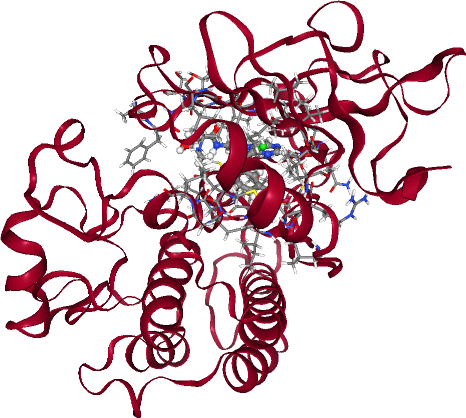

In [26]:
w.render_image(trim=True, factor=2, transparent=True);
w._display_image()

#### Atomic Distances


We zoom in and look for interactions, that might be interesting. In this example we want to look at the backbone methionine coming in close contact with the aromatic rings of the ligand. Theoretically the distances can be calculated for groups of atoms, as long as each group has the same number of atoms, but we want to look at bonds between single atoms.
Single atom selection can be done unambiguously with the combination of residue id and atom name inside that residue, which we note down for the atoms in the bond we wish to analyze.

In [14]:
protein_residue_id = "793"
protein_atom_name = "N"
ligand_id = "1"
ligand_atom_name = "N4"

We select the atomgroups used for our analysis. In our case they will contain one atom each.

In [15]:
atomgroup_protein = u.select_atoms(f"resid {protein_residue_id} and name {protein_atom_name}")
atomgroup_ligand = u.select_atoms(f"resid {ligand_id} and name {ligand_atom_name}")

Now we can calculate the distance between the atoms in the currently set frame of our universe.
The function returns an array of arrays, the first two values are the residue ids, but we are only interested in the third value, the distance.

In [16]:
distance = dist(atomgroup_protein, atomgroup_ligand)
print(f"The distance between residues {protein_residue_id} and {ligand_id} is {round(distance[2][0],2)}Å")

The distance between residues 793 and 1 is 3.52Å


It is more meaningful if we observe the distance over time. To do this we can iterate over the frames and calculate the distance for each of them.

In [17]:
distances = []
for _ in u.trajectory:
    distance = dist(atomgroup_protein, atomgroup_ligand)
    distances.append(distance[2][0])

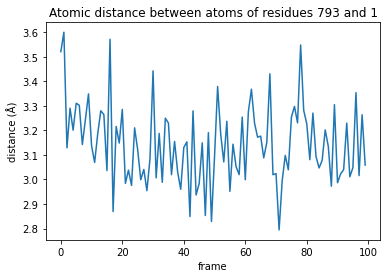

In [18]:
plt.plot(distances)
plt.ylabel('distance (Å)')
plt.xlabel('frame')
plt.title(f"Atomic distance between atoms of residues {protein_residue_id} and {ligand_id}")
plt.show()

#### Hydrogen Bond

The interaction between the ligand and the backbone methionine we analyzed is actually a hydrogen bond. The nitrogen of the backbone from methionine is acting as the donor, the nitrogen in the aromatic ring of the ligand is the acceptor.
We go back to the visualization to get the unique name of the hydrogen forming the bond, then we can use the specialized Hydrogen bond analysis to determine the characteristic distances and angles for the hydrogen bond. The Hydrogen bond analysis covers all frames without manual iteration and is convenient to plot.

In [19]:
hydrogen_name = "H"

In [20]:
def run_hydrogenbond_analysis(donor_resid, donor_atom, hydrogen, acceptor_resid, acceptor_atom,
                                 h_cutoff=1.2, a_cutoff=3.0, angle_cutoff=120):
    """ Perform and Hydrogen Bond Analysis between selcted atomgroups.
    Return the data as readable, formatted Data Frame.

    Parameters
    ----------
    donor_resid : str
        Residue Id of residue containing donor atom in MDAnalysis Universe
    donor_atom : str
        Name of the donor atom in MDAnalysis Universe
    hydrogen : str
        Index of acceptor atom in MDAnalysis Universe
    acceptor_resid : str
        Residue Id of residue containing acceptor atom in MDAnalysis Universe
    acceptor_atom : str
        Name of the acceptor atom in MDAnalysis Universe
    h_cutoff : float, optional
        Distance cutoff used for finding donor-hydrogen pairs
    a_cutoff : float, optional
        Distance cutoff for hydrogen bonds
    angle_cutoff : int, optional
        D-H-A angle cutoff for hydrogen bonds
    
    Returns
    -------
    bond : pandas.core.frame.DataFrame
        DataFrame containing Hydrogen Bond information

    """
    
    #Set up and run un the hydrogenbond analysis
    hbonds = HBA(universe=u,
                 donors_sel="resid " + donor_resid + " and name " + donor_atom,
                 hydrogens_sel="resid " + donor_resid + " and name " + hydrogen,
                 acceptors_sel="resid " + acceptor_resid + " and name " + acceptor_atom,
                 d_h_cutoff=h_cutoff,
                 d_a_cutoff=a_cutoff,
                 d_h_a_angle_cutoff=angle_cutoff)
    hbonds.run()
    
    bond = pd.DataFrame(hbonds.hbonds) #extract bond data
    #name columns (according to MD Analysis function description)
    bond.columns = ["frame", "donor_index", "hydrogen_index",
                    "acceptor_index", "distance", "angle"]
    #set frame as the index
    bond['frame'] = bond['frame'].astype(int)
    bond.set_index("frame", inplace=True, drop=True)

    return bond;

We run the Hydrogen Bond Analysis using our function, which returns it in a practical Data Frame.

In [21]:
bond = run_hydrogenbond_analysis(
    protein_residue_id, protein_atom_name, hydrogen_name,
    ligand_id, ligand_atom_name)
bond.head()

,donor_index,hydrogen_index,acceptor_index,distance,angle
frame,,,,,
17,1483.0,1484.0,5529.0,2.869076,144.729992
21,1483.0,1484.0,5529.0,2.984041,162.869585
23,1483.0,1484.0,5529.0,2.975787,173.412829
26,1483.0,1484.0,5529.0,2.998833,175.310699
28,1483.0,1484.0,5529.0,2.954336,163.733512


Now we plot the hydrogen bond.

In [22]:
def plot_hydrogen_bond_over_time(bond):
    """ Plot the distance and degree of a chosen hydrogen bond over time.
    Peaks in angle and dips in distance represent moments of strong binding.

    Parameters
    ----------
    bond : pandas.core.frame.DataFrame
        hydrogenbond analysis bond data with named columns

    """
    #Add values for missing frames for gapless plotting
    bond = bond.reindex(np.arange(0,99))

    #plot the data
    fig = plt.figure()
    distance = bond.distance.plot(
        title=f'H-Bond between donor {bond.iloc[0].donor_index} and acceptor {bond.iloc[0].acceptor_index}',
        style='o-', x="frame")
    distance.set_ylabel('distance (Å)')
    distance.set_xlabel('frame')
    angle = bond.angle.plot(secondary_y=True, style='o-', x="frame")
    angle.set_ylabel('angle (°)')
    angle.set_xlabel('frame')
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1),
           bbox_transform=distance.transAxes)
    plt.show()

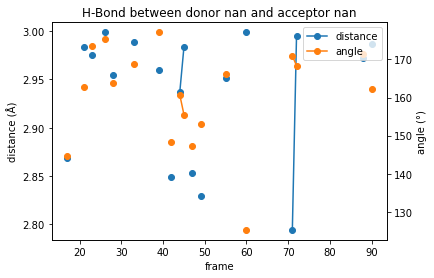

In [23]:
plot_hydrogen_bond_over_time(bond)

In the plot we can see that the bond is inconsistent and is only recognized in some frames during the simulation. Moreover, it does not persist for more than two frames at a time.

The module searches for hydrogen bonds with strict constraints.
Using default settings, the bond is cut every time the distance is larger than 3Å between donor and acceptor or larger than 1.2A between donor and hydrogen or if the angle smaller than 120°. The bond will not be included during frames where the constraints are not met.

To see the development of the bond over the entire simulation we can change those thresholds to detect the bond in its weaker states.
In the graph the angle seems sufficiently high, as opposed to the distance which is close to the 3Å cutoff distance. Thus we try the analysis again with a higher cutoff distances of 5Å for the donor and acceptor distance.

In [24]:
bond = run_hydrogenbond_analysis(
    protein_residue_id, protein_atom_name, hydrogen_name,
    ligand_id, ligand_atom_name, a_cutoff=5.0)
bond.head()

,donor_index,hydrogen_index,acceptor_index,distance,angle
frame,,,,,
0,1483.0,1484.0,5529.0,3.521490,166.393935
1,1483.0,1484.0,5529.0,3.600638,145.629742
2,1483.0,1484.0,5529.0,3.129059,173.952348
3,1483.0,1484.0,5529.0,3.290865,151.991146
4,1483.0,1484.0,5529.0,3.201076,170.205971


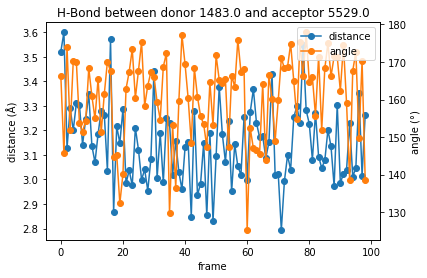

In [25]:
plot_hydrogen_bond_over_time(bond)

## Summary

There are various ways to analyze MD Simulations and in this notebook we explored just a small spectrum. Nevertheless, we gained valuable insights into the binding process happening.

Some methods are more straightforward, like the visualization of the molecule, while others require more finesse.
Especially the hydrogen bond analysis is yet dependent on manual input and tweaking, but with further advancements in the field we can expect the frameworks to become more and more refined.
In the end, all approaches contributed a piece towards understanding the complex interactions captured with the MD simulation.

